## libraries 

In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

### Data collection and preprocessing 

In [10]:
df = pd.read_csv('Mall_Customers.csv') 
#df.head()

# Checking the missing values 
#print(df.isnull().sum())

X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) # find the mean and standard deviation 

## K-means Clustering Implementation

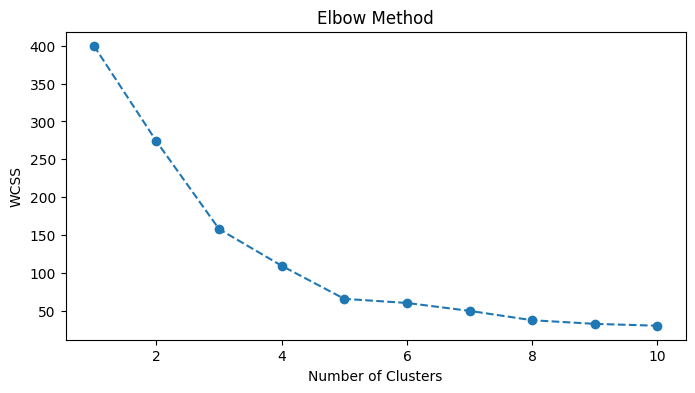

In [15]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 


wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters =i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)


kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X_scaled)

df['Cluster'] = y_kmeans

plt.figure(figsize = (8,4))
plt.plot(range(1,11), wcss, marker = 'o', linestyle = '--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()




## Optimal Number of Clusters


In [22]:
from sklearn.metrics import silhouette_score

for n_clusters in range (2,11):
    kmeans = KMeans(n_clusters = n_clusters , init ='k-means++',random_state =42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the average silhouette score is {silhouette_avg:.3f}")


For n_clusters = 2, the average silhouette score is 0.397
For n_clusters = 3, the average silhouette score is 0.467
For n_clusters = 4, the average silhouette score is 0.494
For n_clusters = 5, the average silhouette score is 0.555
For n_clusters = 6, the average silhouette score is 0.514
For n_clusters = 7, the average silhouette score is 0.502
For n_clusters = 8, the average silhouette score is 0.455
For n_clusters = 9, the average silhouette score is 0.457
For n_clusters = 10, the average silhouette score is 0.445


## Cluster Profiling and Insights

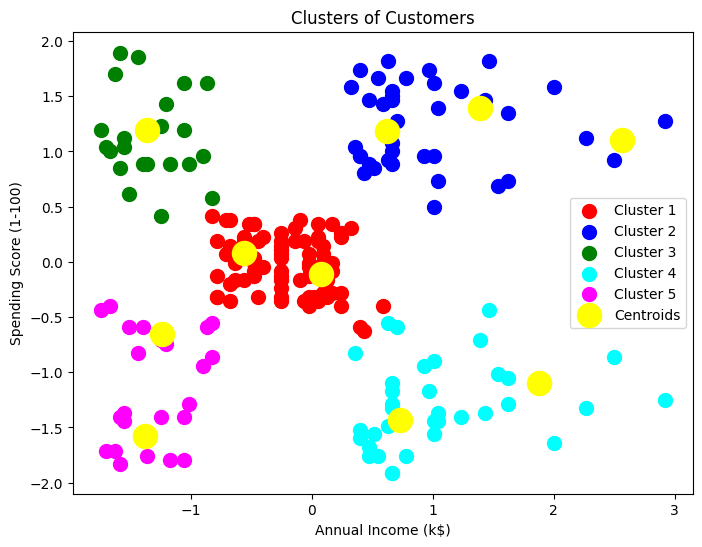

In [30]:

numeric_columns = df.select_dtypes(include=['number']).columns

cluster_profiles = df.groupby('Cluster')[numeric_columns].mean()
#print(cluster_profiles)

# Visualizing the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[y_kmeans == 0, 0], X_scaled[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X_scaled[y_kmeans == 1, 0], X_scaled[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X_scaled[y_kmeans == 2, 0], X_scaled[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X_scaled[y_kmeans == 3, 0], X_scaled[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X_scaled[y_kmeans == 4, 0], X_scaled[y_kmeans == 4, 1], s=100, c='magenta', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
